In [4]:
from sympy import *
import numpy as np
from numpy import *
from scipy import *
from scipy import stats
import matplotlib.pylab as plt
from pandas import *
import pandas as pd

# RECAP

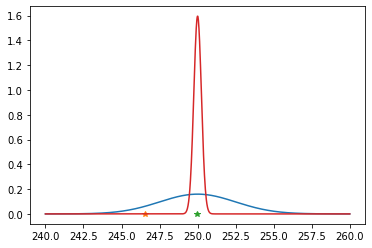

In [18]:

std =2.5
mean = 250
x = linspace(mean-4*std,mean+4*std,1000)
pdf = stats.norm.pdf(x,loc=mean,scale=std)
plt.plot(x,pdf)
# plotting one vlaue 
obs = np.random.randn(1)*std+mean
plt.plot(obs,0,'*')
# now plotting a sample of 100
sample = np.random.randn(100)*std+mean
# let us plto the sample mean and see it should be closer to the true mean 250
plt.plot(sample.mean(),0,'*')
pdfSampleMean = stats.norm.pdf(x,loc=mean,scale=std/sqrt(100))
plt.plot(x,pdfSampleMean)
# as the sample size goes up it is very easy to spot the true mean 
plt.show()

# 

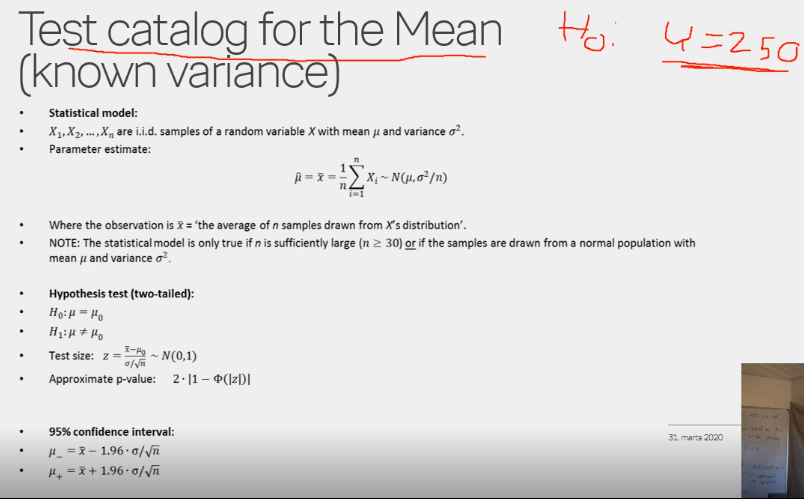

P-value : 0.07186063822585158
the z score t(est staistic point) for the sample mean is  -1.8
the area for the z score  -1.8  multiplied by 2 is  0.07186063822585158
 we can thus say that the area of the 2*z + -1.8  =  0.07186063822585158  is bigger than the area of alpha +-1.96  =0.05 
95% confedence interval lower (the critical values)=  245.3 and u-uper is: 250.2
95% confedence interval lower =  245.30004501932493 and u-uper is: 250.19995498067507
the point where alpha is 0.025 has a critical value  : -1.9599639845400545
the point where 1 - alpha is 0.975 has a critical value => alpha is to the right of : 1.959963984540054


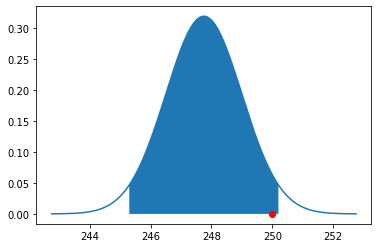

In [48]:
# we used the np array so that we have access to many mehtod
x = np.array([245,248,249,249])
u = 250
n = 4
# can we reject that the true mean is 250 
# H0 : u = 250
# H1 : u != 250
# so we need to test that teh P-value of the sample mean is greater than the significant confidence level alfa = 0.05
# if so we cannot reject the H0
std=2.5
# P-value
# this is the area to the left of the mean that is started from
# the location of the true mean and with std of (true std/sqrt(samplesize))
prop = stats.norm.cdf(x.mean(),loc=250,scale=std/sqrt(n))
# to get the pvalue we just multiply the result by 2 
# because it is a two tailed test
print('P-value :',prop*2)
# print('The P-value is 0,07 which is bigger that alpha 0,05')
# print('that means we cannot reject the H0 that u = 250 even though we get a sample mean of 246.7')

# formula to calculate the z-score of the sample mean
# u = 250, std =2.5, sample size n = 4
z = ((x.mean()-u)/(std/sqrt(n)))
print('the z score (test staistic point) for the sample mean is ',z)

# to get the probability of the z ('the area to the left of that point') which is the P-value
zprob= stats.norm.cdf(z)

# *2 because it is two tailed
print('the area for the z score ',z,' multiplied by 2 is ' ,zprob*2)
print(' we can thus say that the area of the 2*z +',z , ' = ',zprob*2,' is bigger than the area of alpha +-1.96  =0.05 ')
# to calculate the confidence interval 
ulow = x.mean() -1.96*std/sqrt(n)
uupper = x.mean() +1.96*std/sqrt(n)
# this mean, based on our sample the true mean is  with 95% confident is inbetween the upper and the lover value
# we can also calculate it using the ppf function based on the sample like so 
print('95% confedence interval lower (the critical values)= ',ulow,'and u-uper is:', uupper)
# or we can calculate using the percintile probability function 
lower2 = stats.norm.ppf(0.025,loc=x.mean(),scale=std/sqrt(n))
upper2 = stats.norm.ppf(0.975,loc=x.mean(),scale=std/sqrt(n))

print('95% confedence interval lower = ',lower2,'and u-uper is:', upper2)


# -1.96 is the critical value for the area 0.025 to the left of  
# -1.96 is the critical value for the 0.975 to the right
# we calculate is using the precentage percentile function

print('the point where alpha is 0.025 has a critical value  :',stats.norm.ppf(0.025))
print('the point where 1 - alpha is 0.975 has a critical value => alpha is to the right of :',stats.norm.ppf(0.975))
# let us plot to see
plt.figure()
# let us put the values in a linspace
x = np.linspace(x.mean()-4*std/sqrt(n),x.mean()+4*std/sqrt(n),1000)
# let us make the probability density function of this sample mean
prob = stats.norm.pdf(x,loc=x.mean(),scale=std/sqrt(n))
# now we plot x and the pdf function for the mean 
plt.plot(x,prob)
# if we want to shade the area where we cannot reject the nullH 
# then we shade the area between the upper and the lover critical values
xf= linspace(ulow,uupper,1000)
plt.fill_between(xf,stats.norm.pdf(xf,loc=x.mean(),scale=std/sqrt(n)))
# then we plot the true mean also to see where it is on the plot
# ro is just the same as saying I need a circle 
plt.plot(250,0,'ro')
plt.show()


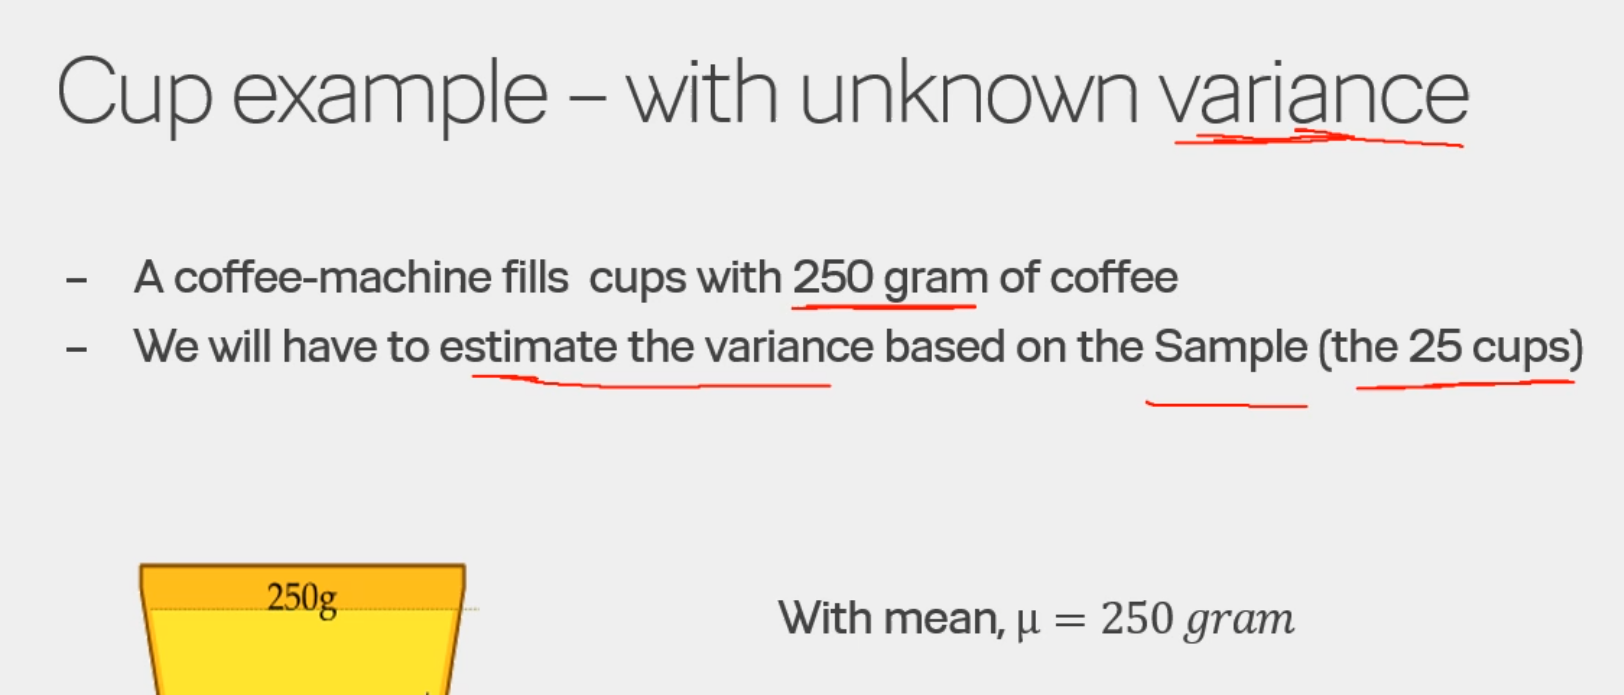

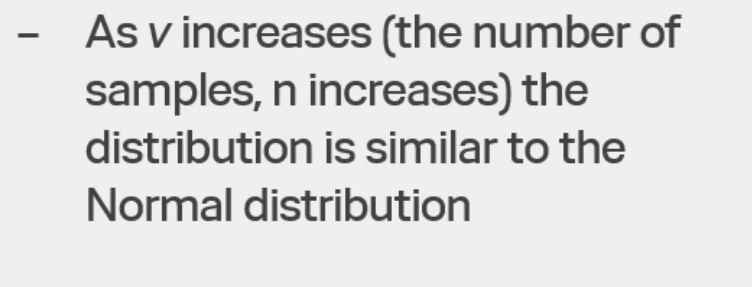

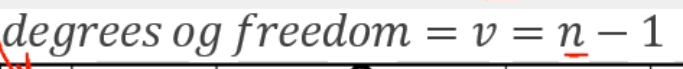

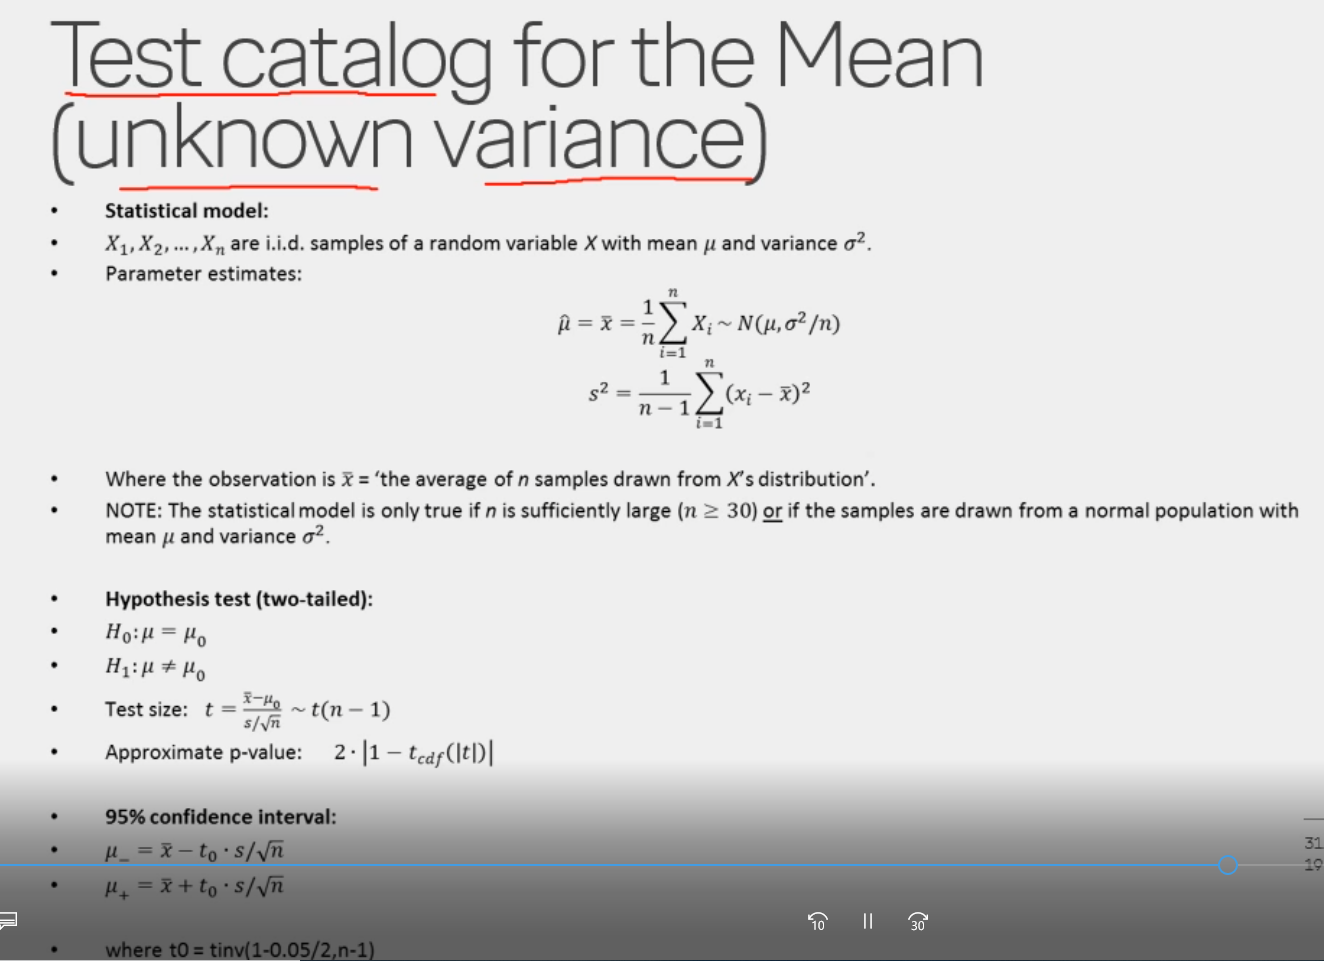


In [10]:
x = np.array([245,248,249,249])
n = 4
# here we are estimating the std for the t test
s = x.std(ddof=1)
# df=len(x)-1 is the degree of freedom which is always = n-1
prob = stats.t.cdf(x.mean(),df=len(x)-1,loc=250,scale=s/sqrt(len(x)))
# we multiply by two since it is a two tailed test
print('P-value is ', prob*2)

P-value is  0.09786343485356977


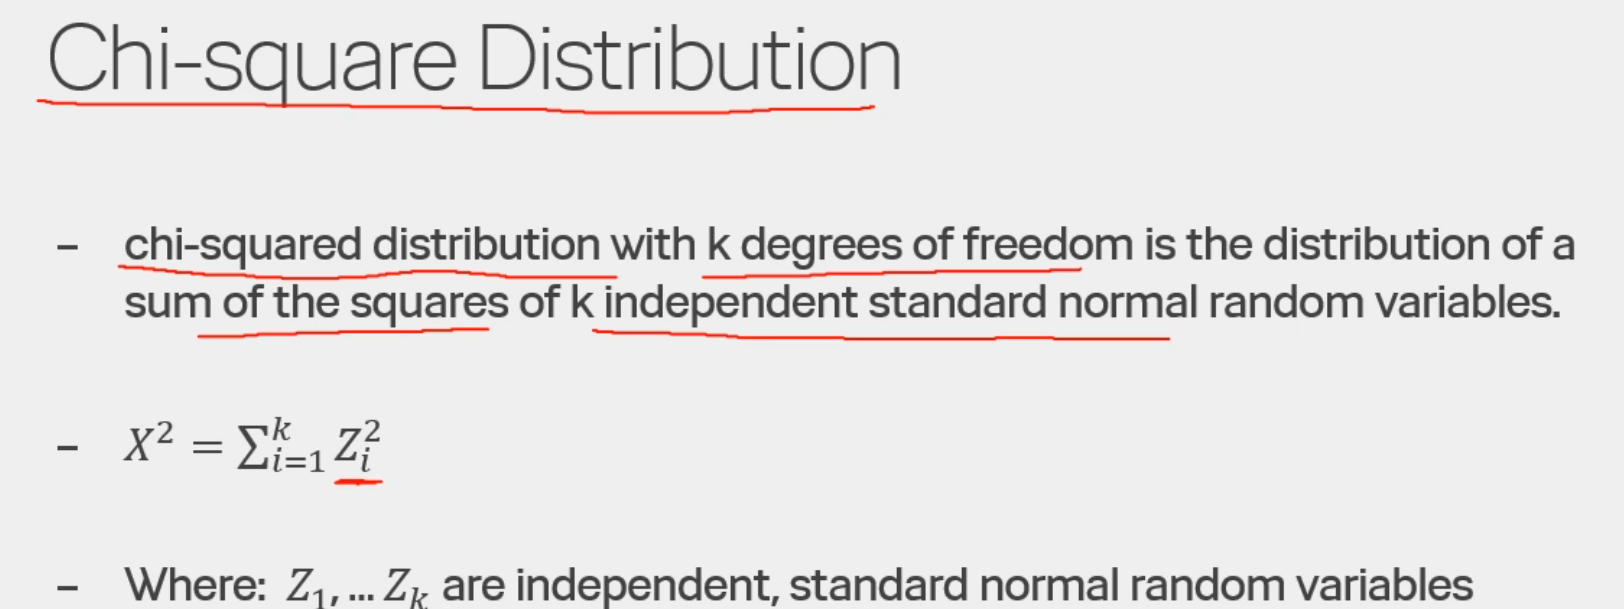

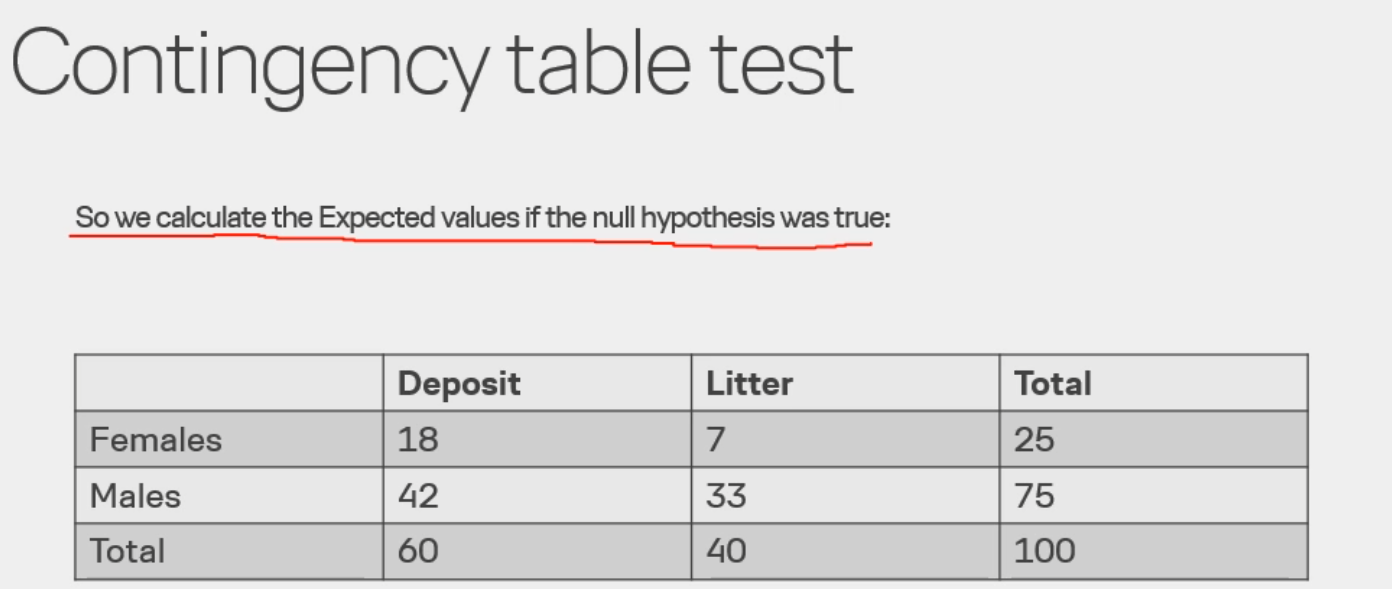

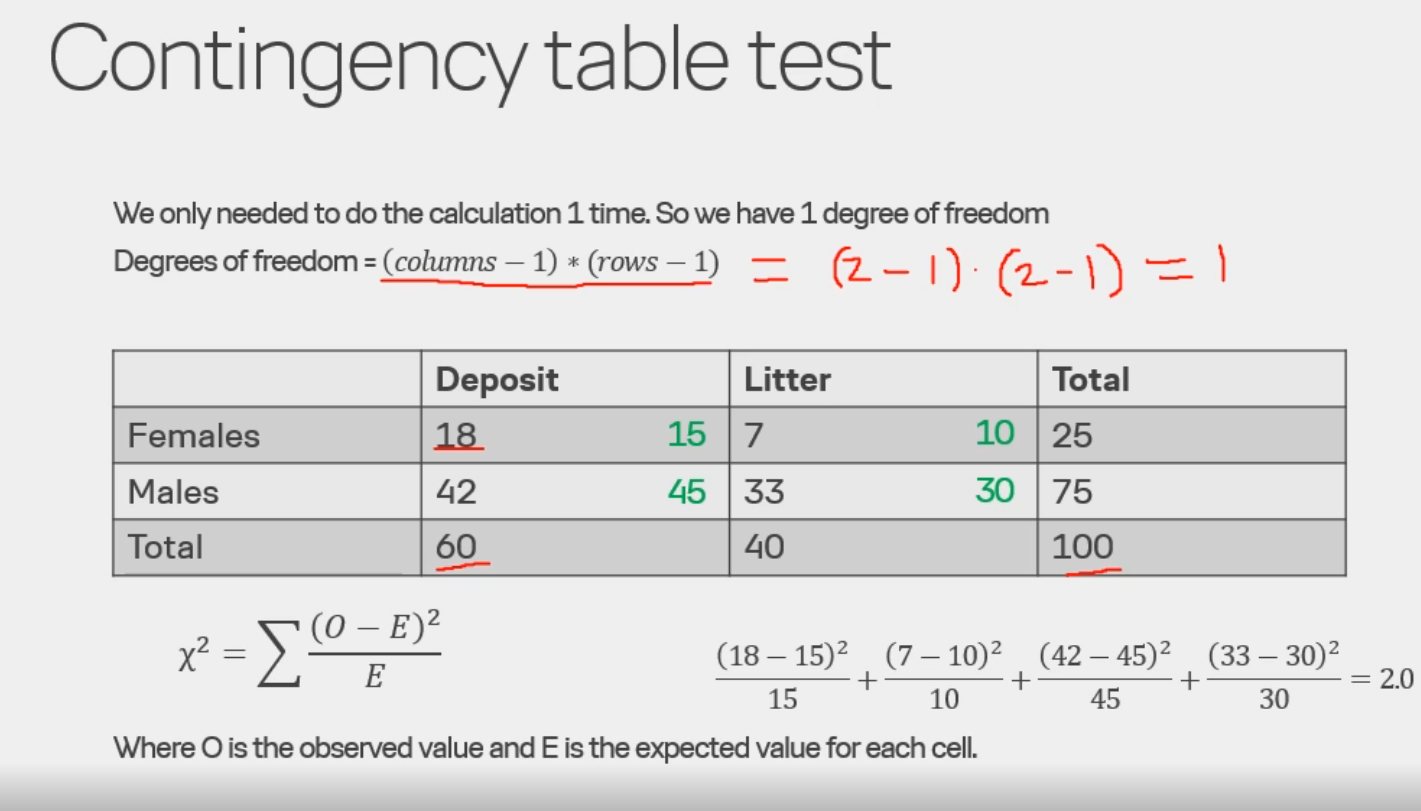

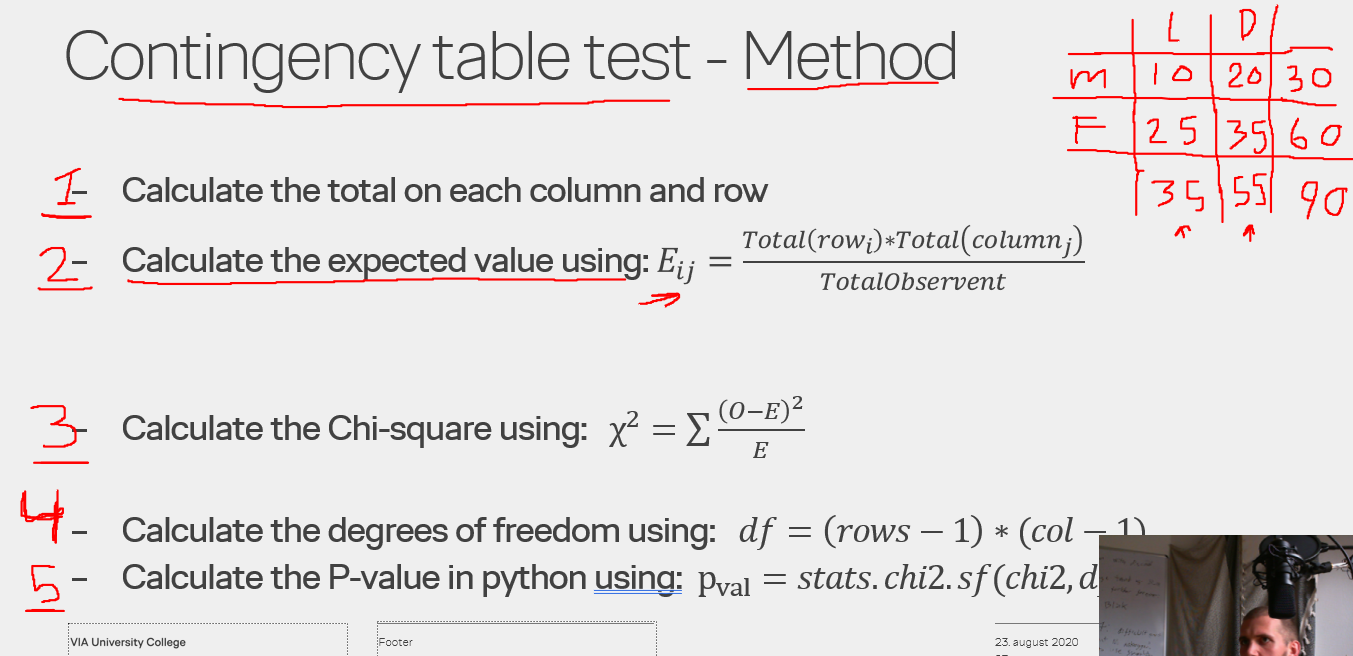

In [24]:
obs = np.array([[18,7],[42,33]])
display(obs)
# row_total = np.sum(obs,1)
# col_total = np.sum(obs,0)
# total = sum(col_total)

# ex = np.array([[row_total[0]*col_total[0]/total,row_total[0]*col_total[1]/total ],[row_total[1]*col_total[0]/total,row_total[1]*col_total[1]/total]])

# chi2_stat = np.sum(np.square(obs-ex)/ex)
# p_val = 1-stats.chi2.cdf(chi2_stat, df=1)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False)
print(ex2)


# rement this number is greater that 5% so we cannot reject the hypotheis

array([[18,  7],
       [42, 33]])

[[15. 10.]
 [45. 30.]]


#EXERCISE

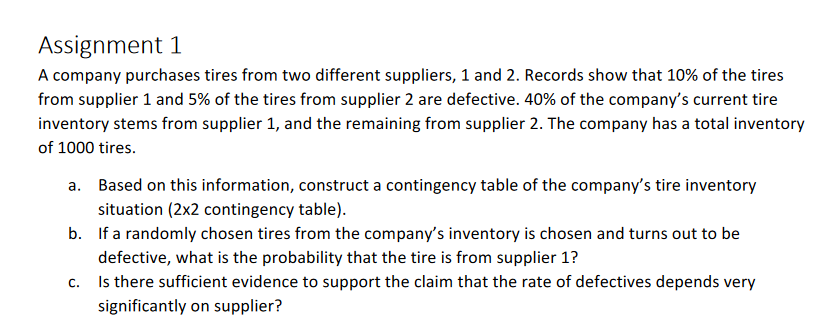

In [6]:
#a)
df = pd.DataFrame({"Supplier1":[360, 40], "Supplier2":[570, 30]}, index=['Good tires', 'Defective Tires'])
display(df)
#b)
# do it by paper is much easier
display("Probability of supplier 1 Given that its defective, P(supp1|Deff) ",df.loc["Defective Tires","Supplier1"]/df.loc["Defective Tires",:].sum())

#c)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))

print("Very significantly corrospond to a significance level of 0.01. Since the p_value is smaller than this, we can reject H0. The tires quality does depend on the supplier.  ")

,Supplier1,Supplier2
Good tires,360,570
Defective Tires,40,30


'Probability of supplier 1 Given that its defective, P(supp1|Deff) '

0.5714285714285714

p_value = 0.0023983184964129424
Very significantly corrospond to a significance level of 0.01. Since the p_value is smaller than this, we can reject H0. The tires quality does depend on the supplier.  


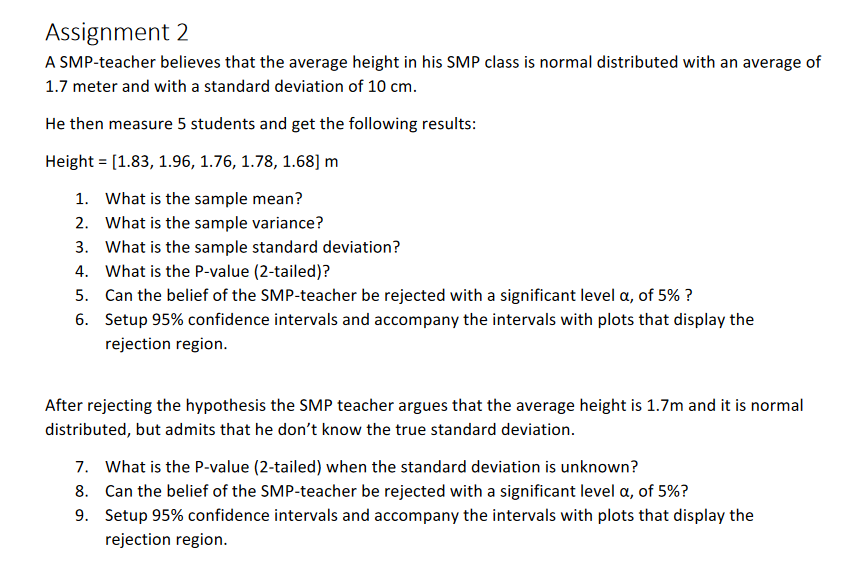

sample mean =  1.802
sample var =  0.01072
sample std =  0.10353743284435828
p_value =  0.022560915657808822
yes as P_value is less than the significanse level 5%


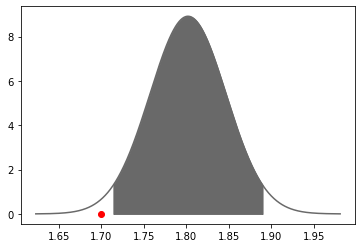

p_value =  0.09235730899034578
No as the P_value is bigger than than 0.05. The SMP-teacher might be right. 


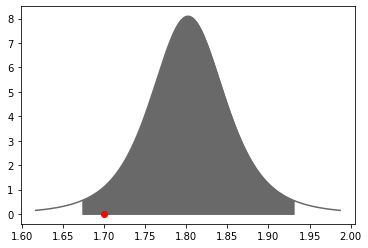

In [56]:
mean = 1.7
sd = 0.1
n = 5
# Assignment 1   1.7 std=10cm
X = np.array([1.83, 1.96, 1.76, 1.78, 1.68])
 
#1)
print('sample mean = ', X.mean())
#2)
# “Delta Degrees of Freedom”: the divisor used in the calculation is N
# - ddof, where N represents the number of elements. By default ddof is zero
print('sample var = ', X.var(ddof=1)) #sample var =  0.01072
#3)
print('sample std = ', X.std(ddof=1))#sample std =  0.1035

#4)
prob = stats.norm.cdf(X.mean(), mean, scale=0.1/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) # p_value =  0.02256
#5) 
print('yes as P_value is less than the significanse level 5%')



#6)
x = np.linspace(X.mean()-4*sd/np.sqrt(len(X)), X.mean()+4*sd/np.sqrt(len(X)), 1000)
y = stats.norm.pdf(x, X.mean(), sd/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey') 
b_min = stats.norm.ppf(0.025, X.mean(), sd/np.sqrt(len(X)))
b_max = stats.norm.ppf(0.975, X.mean(), sd/np.sqrt(len(X)))
xf = np.linspace(b_min,b_max, 1000)
plt.fill_between(xf, stats.norm.pdf(xf, X.mean(), sd/np.sqrt(len(X))), color = 'dimgrey')
plt.plot(mean, 0, 'ro')
plt.show()




#7)
# cdf because we need the value
prob = stats.t.cdf(X.mean(), df=len(X)-1, loc=mean, scale=X.std(ddof=1)/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) #p_value =  0.092357

#8)
print('No as the P_value is bigger than than 0.05. The SMP-teacher might be right. ')


#9)
plt.figure()
x = np.linspace(X.mean()-4*X.std(ddof=1)/np.sqrt(len(X)), X.mean()+4*X.std(ddof=1)/np.sqrt(len(X)), 1000)
# pdf because we need to plot the function

y = stats.t.pdf(x,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.t.ppf(0.025,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
b_max = stats.t.ppf(0.975,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 1000)
plt.fill_between(xf, stats.t.pdf(xf,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

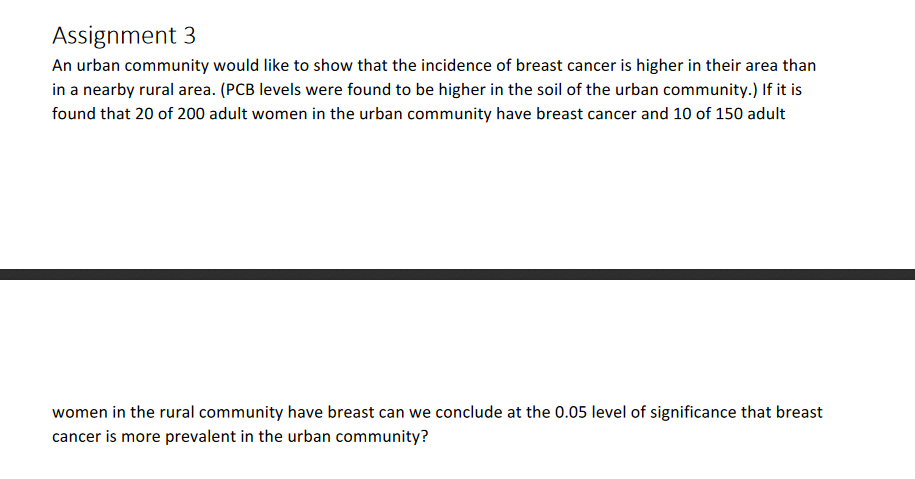

In [57]:
df = pd.DataFrame({"Urban community":[20, 180], "Rural community":[10, 140]}, index=['Breast cancer', 'No cancer'])
display(df)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))
print("Significantly corrospond to a significance level of 0.05. Since the p_value is greater than this, we cannot reject H0. The risk of getting breastcancer might be independent of rural area. ")

,Urban community,Rural community
Breast cancer,20,10
No cancer,180,140


p_value = 0.2702893848016953
Significantly corrospond to a significance level of 0.05. Since the p_value is greater than this, we cannot reject H0. The risk of getting breastcancer might be independent of rural area. 


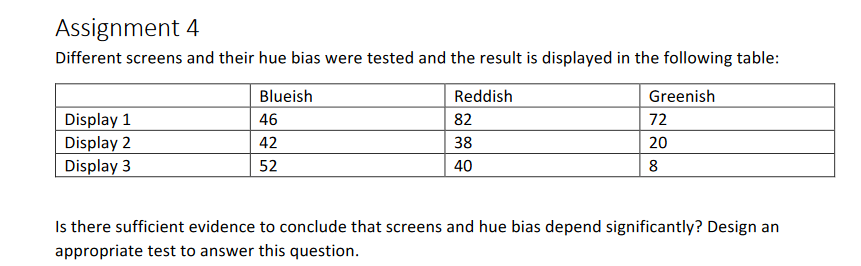

In [58]:
df = pd.DataFrame({"Blueish":[46, 42,52], "Reddish":[82, 38,40], "Greenish":[72, 20,8]}, index=['Display 1','Display 2','Display 3'])
display(df)

chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
print("p_value = "+ str(p_val))
print("As 3.795777297500132e-08<0.05 the null hypothesis can be rejected. The hue bias does depend on the display ")

,Blueish,Reddish,Greenish
Display 1,46,82,72
Display 2,42,38,20
Display 3,52,40,8


p_value = 3.795777297500132e-08
As 3.795777297500132e-08<0.05 the null hypothesis can be rejected. The hue bias does depend on the display 


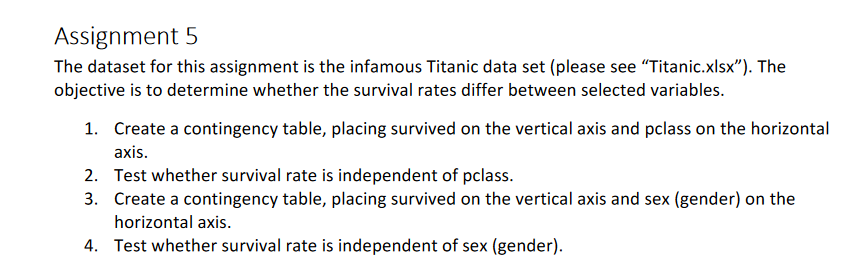

In [74]:
data = pd.read_excel("Titanic.xlsx") 
 
# print (data.head(100)) 
 
#1)
df = pd.crosstab(data['survived'], data['pclass'], margins = False) 
print(df)

#2)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(df, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print(p_val<0.05)
print("As the p-value is less than 0.05 survival rate depends on class")

#3)
data_crosstab = pd.crosstab(data['survived'], data['sex'], margins = True) 
print(data_crosstab)

#4)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 survival rate depends on gender")

pclass      1    2    3
survived               
0         123  158  528
1         200  119  181


'p-value = 1.7208259588256052e-28'

'degrees of freedom = 2'

True
As the p-value is less than 0.05 survival rate depends on class
sex       female  male   All
survived                    
0            127   682   809
1            339   161   500
All          466   843  1309


'p-value = 6.506436068205604e-78'

'degrees of freedom = 4'

As the p-value is less than 0.05 survival rate depends on gender


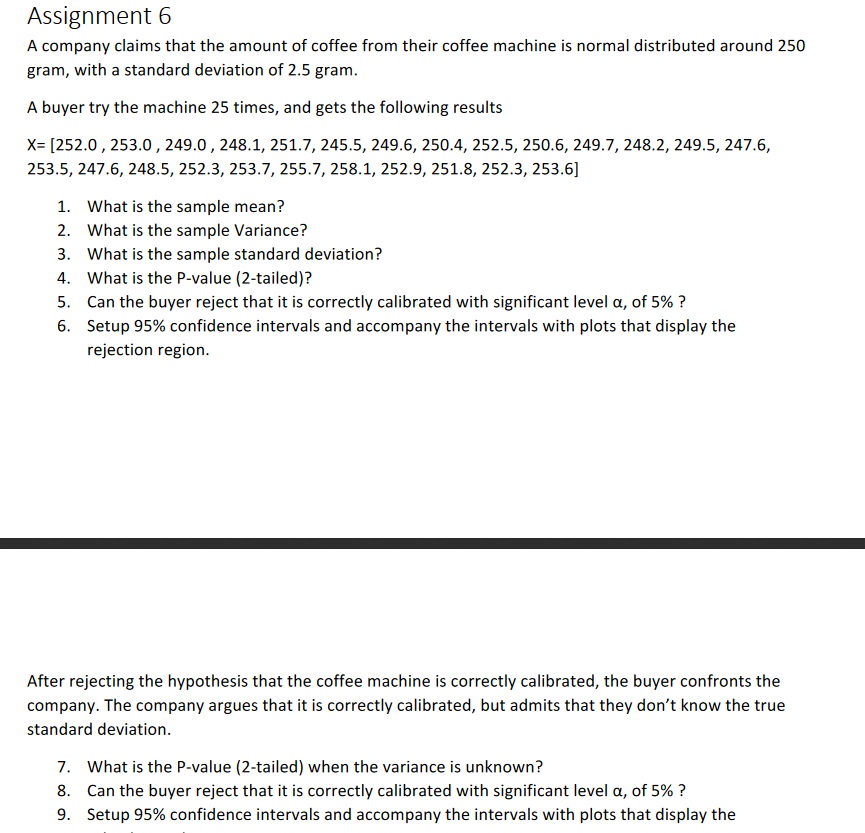

sample mean =  251.09600000000003
sample var =  8.092900000000018
sample std =  2.8448022778393613
p_value =  0.028379506632798757
yes as P_value is less than the significanse level 5%


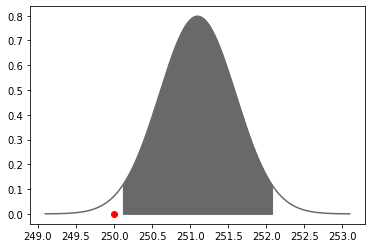

p_value =  0.06598787079213086
No as the P_value is bigger than than 0.05 


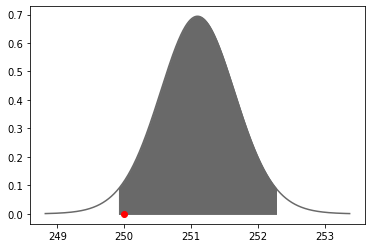

In [81]:
X= np.array([252.0 , 253.0 , 249.0 , 248.1, 251.7, 245.5, 249.6, 250.4, 252.5, 250.6, 249.7, 248.2, 249.5, 247.6, 253.5, 247.6, 248.5, 252.3, 253.7, 255.7, 258.1, 252.9, 251.8, 252.3, 253.6])
#1)
print('sample mean = ', X.mean()) #sample mean =  251.0
#2)
print('sample var = ', X.var(ddof=1)) #sample var =  8.09
#3)
print('sample std = ', X.std(ddof=1))#sample std =  2.84
#4)
# remember cdf when I want the value
prob = stats.norm.cdf(X.mean(), loc=250, scale=2.5/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) # p_value =  0.0283795
#5) 
print('yes as P_value is less than the significanse level 5%')


#6)
mean=250
sd = 2.5
x = np.linspace(X.mean()-4*sd/np.sqrt(len(X)), X.mean()+4*sd/np.sqrt(len(X)), 1000)
y = stats.norm.pdf(x, X.mean(), sd/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.norm.ppf(0.025, X.mean(), sd/np.sqrt(len(X)))
b_max = stats.norm.ppf(0.975, X.mean(), sd/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 100)
plt.fill_between(xf, stats.norm.pdf(xf, X.mean(), sd/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()


#7) 
prob = stats.t.cdf(X.mean(), df=len(X)-1, loc=250, scale=X.std(ddof=1)/np.sqrt(len(X)))
p_val = 2*min(prob, 1-prob)
print('p_value = ', p_val) #p_value =  0.06598787

#8) 
print('No as the P_value is bigger than than 0.05 ')


#9) 
plt.figure()
x = np.linspace(X.mean()-4*X.std(ddof=1)/np.sqrt(len(X)), X.mean()+4*X.std(ddof=1)/np.sqrt(len(X)), 1000)
y = stats.t.pdf(x,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
plt.plot(x,y, color = 'dimgrey')
 
b_min = stats.t.ppf(0.025,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
b_max = stats.t.ppf(0.975,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X)))
 
xf = np.linspace(b_min,b_max, 1000)
plt.fill_between(xf, stats.t.pdf(xf,df=len(X)-1, loc=X.mean(), scale=X.std(ddof=1)/np.sqrt(len(X))), color = 'dimgrey')
 
plt.plot(mean, 0, 'ro')
plt.show()

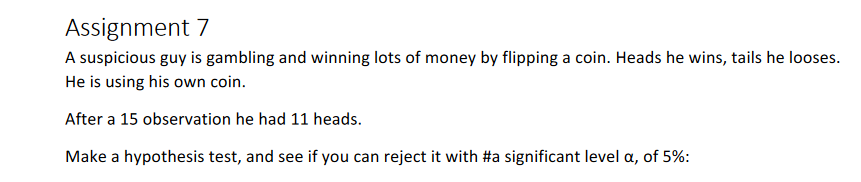

In [82]:
p_val=stats.binom.sf(k=10, n=15, p=0.5)
print('P_value = ',p_val)
# Can also be calculated in the following way:
p_val=stats.binom.pmf(k=[11,12,13,14,15], n=15, p=0.5)
print('P_value = ',sum(p_val))

print("As the P-value > significance level of 0.05 we cannot reject the null-hypothesis. ")

P_value =  0.059234619140624986
P_value =  0.059234619140625173
As the P-value > significance level of 0.05 we cannot reject the null-hypothesis. 


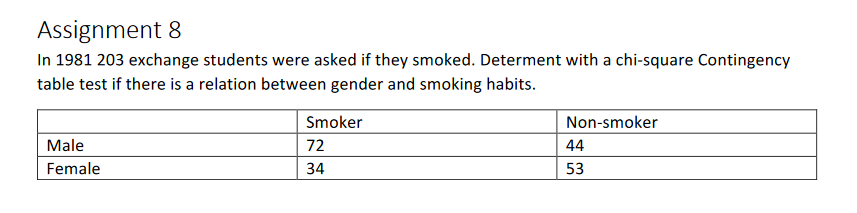

In [83]:
Significance_level = 0.05
obs = [[72,44],[34,53]]
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False)
print('P_value = ',p_val)
if p_val<0.05:
    print("Since the p_value is smaller than the sinificance level (" +str(round(p_val,5))+"<"+str(Significance_level)+") we can reject the null hypothesis. The varialbes are dependent on each other. ")
else:
    print("Since the p_value is greater than the sinificance level (" +str(round(p_val,5))+">"+str(Significance_level)+") we cannot reject the null hypothesis. The varialbes are independent on each other. ")


P_value =  0.0011746947930915239
Since the p_value is smaller than the sinificance level (0.00117<0.05) we can reject the null hypothesis. The varialbes are dependent on each other. 


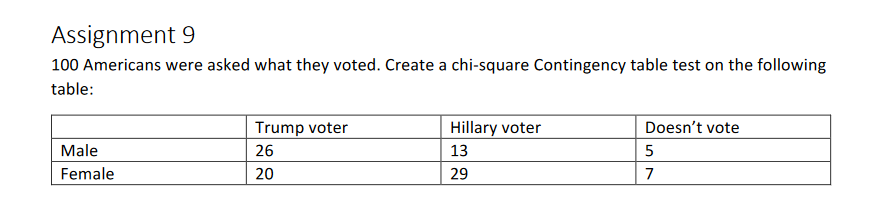

In [84]:
Significance_level = 0.05
obs = [[26,13,5],[20,29,7]]
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(obs, correction=False)

if p_val<0.05:
    print("Since the p_value is smaller than the sinificance level (" +str(round(p_val,5))+"<"+str(Significance_level)+") we can reject the null hypothesis. The varialbes are dependent on each other. ")
else:
    print("Since the p_value is greater than the sinificance level (" +str(round(p_val,5))+">"+str(Significance_level)+") we cannot reject the null hypothesis. The varialbes are independent on each other. ")



Since the p_value is greater than the sinificance level (0.05352>0.05) we cannot reject the null hypothesis. The varialbes are independent on each other. 


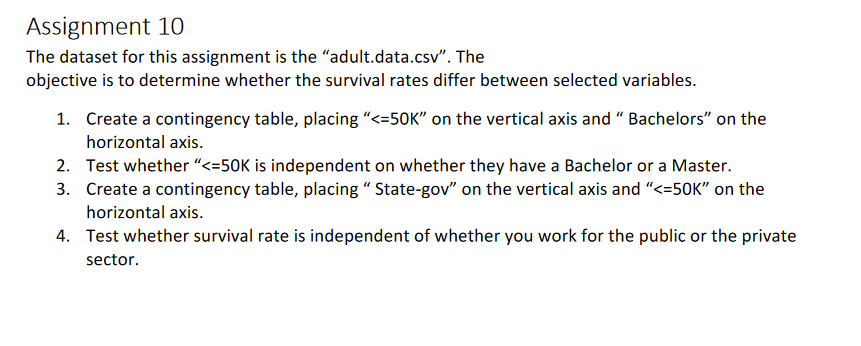

In [94]:
data = pd.read_csv("adult.data.csv") 
# print (dataB.head(7)) 

#1)
dataB = data[data[' Bachelors'].isin([' Bachelors' , ' Masters'])]

data_crosstab = pd.crosstab(dataB[' <=50K'], dataB[' Bachelors'], margins = False) 
print(data_crosstab)

#2)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 salery depends on wether you have a Master or a bachellor")


#3)
dataS = data[data[' State-gov'].isin([' State-gov' , ' Private'])]
data_crosstab = pd.crosstab(dataS[' State-gov'], dataS[' <=50K'], margins = False) 
print(data_crosstab)

#4)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print("As the p-value is less than 0.05 salery depends on wether you work for the Public or the Private")

 Bachelors   Bachelors   Masters
 <=50K                          
 <=50K            3133       764
 >50K             2221       959


'p-value = 7.899312840404235e-25'

'degrees of freedom = 1'

As the p-value is less than 0.05 salery depends on wether you have a Master or a bachellor
 <=50K       <=50K   >50K
 State-gov               
 Private     17733   4963
 State-gov     944    353


'p-value = 6.430111938009106e-06'

'degrees of freedom = 1'

As the p-value is less than 0.05 salery depends on wether you work for the Public or the Private
